In [1]:
import numpy
import math
import scipy.special
import matplotlib.pyplot as plt
import scipy.ndimage
%matplotlib inline

In [2]:
class neuralNetwork:
    def __init__(self,input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        self.lr = learning_rate
        
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        self.activation_func = lambda x: scipy.special.expit(x)
        self.reverse_func = lambda x: scipy.special.logit(x)
        pass
    
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_func(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_func(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        self.who += self.lr * numpy.dot(output_errors * final_outputs * (1 - final_outputs), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot(hidden_errors * hidden_outputs * (1 - hidden_outputs), numpy.transpose(inputs))        
        pass
    
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_func(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_func(final_inputs)
        
        return final_outputs
    
    def back_query(self, targets_list):
        final_outputs = numpy.array(targets_list, ndmin=2).T
        
        final_inputs = self.reverse_func(final_outputs)
        
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        hidden_inputs = self.reverse_func(hidden_outputs)
        
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return (inputs)

In [3]:
train_data_file = open("mnist_dataset/mnist_train.csv", "r")
train_data_list = train_data_file.readlines()
train_data_file.close()

In [4]:
check = train_data_list[1].split(",")
image_array = numpy.asfarray(check[1:]).reshape(28, 28)

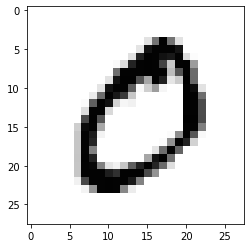

In [5]:
plt.imshow(image_array, cmap="Greys", interpolation="None")

In [6]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
learning_rate = 0.01

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [7]:
epochs = 10
for e in range(epochs):
    for record in train_data_list:
        all_values = record.split(",")
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        inputs_plus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28, 28), 10, cval=0.01, order=1 ,reshape=False)
        n.train(inputs_plus10_img.reshape(784), targets)
        inputs_minus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28, 28), -10, cval=0.01, order=1 ,reshape=False)
        n.train(inputs_minus10_img.reshape(784), targets)

In [8]:
test_data_file = open("mnist_dataset/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [9]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


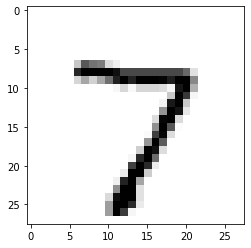

In [10]:
image_array = numpy.asfarray(all_values[1:]).reshape(28, 28)
plt.imshow(image_array, cmap="Greys", interpolation="None")

In [11]:
a = n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)
print(a)

[[0.01567661]
 [0.00700517]
 [0.00241465]
 [0.01567572]
 [0.00383627]
 [0.0077154 ]
 [0.00208021]
 [0.98716877]
 [0.00578576]
 [0.00851657]]


In [12]:
scorecard = []

for record in test_data_list:
    all_values = record.split(",")
    correct_label = int(all_values[0])
#     print(correct_label, "истинный маркер")
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
#     print(label, "ответ сети")
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)

In [13]:
# scorecard

In [14]:
scorecard_array = numpy.asarray(scorecard)
print('эффективность = ', scorecard_array.sum() / scorecard_array.size)

эффективность =  0.9767


In [15]:
import imageio
import glob

In [21]:
img_array = imageio.imread('test_01.png', as_gray=True)

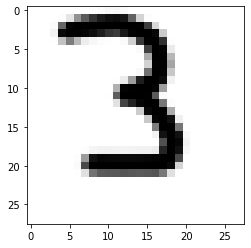

In [22]:
img_data = 255.0 - img_array.reshape(784)
img_data1 = img_data.reshape(28, 28)
plt.imshow(img_data1, cmap="Greys", interpolation="None")

In [23]:
img_data = (img_data / 255.0 * 0.99) + 0.01

In [24]:
numpy.argmax(n.query(img_data))

3

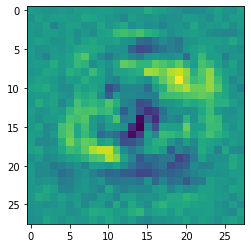

In [27]:
label = 0

targets = numpy.zeros(output_nodes) + 0.01
targets[label] = 0.99

img_data = n.back_query(targets)

plt.imshow(img_data.reshape(28, 28), interpolation="None")